In [1]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [11]:
df=pd.read_csv("titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Data Preprocessing

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
df.shape

(891, 12)

Drop the cabin column from the dataframe

In [16]:
df.drop(["Cabin"],axis=1, inplace=True)

Replacing the missing values in the age column with mean values

In [17]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [18]:
print(df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [19]:
#replacing the missing value in embarked with mode

df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [20]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Analysis

In [21]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

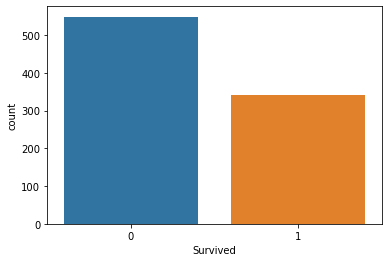

In [22]:
sns.countplot("Survived", data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

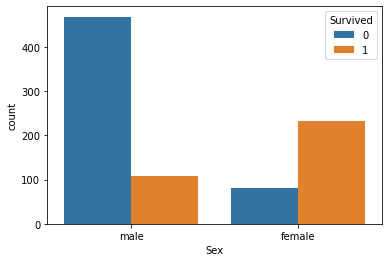

In [23]:
sns.countplot('Sex',hue='Survived',data=df)

We can see that even being more in number, men had less rate of survival, which means women were given priority while rescue operations.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

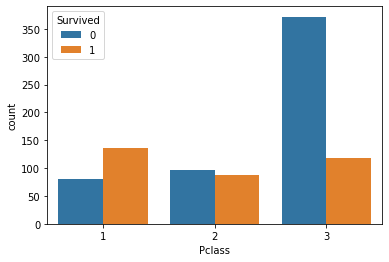

In [24]:
sns.countplot('Pclass',hue='Survived',data=df)

<AxesSubplot:xlabel='Age', ylabel='Count'>

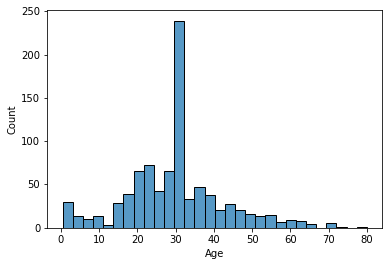

In [25]:
sns.histplot(df["Age"])

In [26]:
# encoding sex column
df.replace({'Sex':{'male':0, 'female':1}}, inplace=True)
df.replace({'Embarked':{'C':0,'S':1,'Q':2}},inplace=True)

In [27]:
df.drop(columns =['PassengerId','Ticket','Name'], axis=1, inplace= True)

In [28]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,1
1,1,1,1,38.000000,1,0,71.2833,0
2,1,3,1,26.000000,0,0,7.9250,1
3,1,1,1,35.000000,1,0,53.1000,1
4,0,3,0,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,1
887,1,1,1,19.000000,0,0,30.0000,1
888,0,3,1,29.699118,1,2,23.4500,1
889,1,1,0,26.000000,0,0,30.0000,0


In [29]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

In [30]:
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]

In [31]:
threshold=3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
       5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
       4, 4, 3, 5, 4, 5], dtype=int64))


In [32]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,1
1,1,1,1,38.000000,1,0,71.2833,0
2,1,3,1,26.000000,0,0,7.9250,1
3,1,1,1,35.000000,1,0,53.1000,1
4,0,3,0,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,1
887,1,1,1,19.000000,0,0,30.0000,1
888,0,3,1,29.699118,1,2,23.4500,1
889,1,1,0,26.000000,0,0,30.0000,0


In [33]:
#Checking skewness
df.skew()

Survived    0.450825
Pclass     -0.632242
Sex         0.664152
Age         0.318314
SibSp       1.979577
Parch       2.122629
Fare        2.318761
Embarked   -0.148774
dtype: float64

In [34]:
df["SibSp"]=np.cbrt(df["SibSp"])
df["Parch"]=np.cbrt(df["Parch"])
df["Fare"]=np.power(df["Fare"],0.25)

In [35]:
df.skew()

Survived    0.450825
Pclass     -0.632242
Sex         0.664152
Age         0.318314
SibSp       1.018770
Parch       1.643259
Fare       -0.004748
Embarked   -0.148774
dtype: float64

<AxesSubplot:>

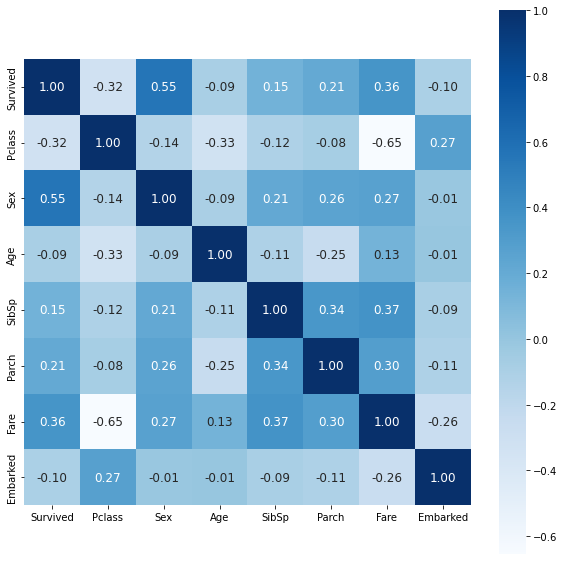

In [36]:
# To find multicolinearity

correlation=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':12},cmap="Blues")

In [37]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1.0,0.000000,1.640909,1
1,1,1,1,38.000000,1.0,0.000000,2.905674,0
2,1,3,1,26.000000,0.0,0.000000,1.677837,1
3,1,1,1,35.000000,1.0,0.000000,2.699440,1
4,0,3,0,35.000000,0.0,0.000000,1.684414,1
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0.0,0.000000,1.898829,1
887,1,1,1,19.000000,0.0,0.000000,2.340347,1
888,0,3,1,29.699118,1.0,1.259921,2.200573,1
889,1,1,0,26.000000,0.0,0.000000,2.340347,0


In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(df.iloc[:,:-1].values,i) for i in range(df.iloc[:,:-1].shape[1])]
vif["features"]=df.iloc[:,:-1].columns
print(vif)

   VIF Factor  features
0    2.637114  Survived
1    4.016460    Pclass
2    2.307146       Sex
3    7.132499       Age
4    1.758620     SibSp
5    1.602099     Parch
6   11.984178      Fare


In [39]:
df.drop(['Fare'],axis =1, inplace = True)

In [40]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.000000,1.0,0.000000,1
1,1,1,1,38.000000,1.0,0.000000,0
2,1,3,1,26.000000,0.0,0.000000,1
3,1,1,1,35.000000,1.0,0.000000,1
4,0,3,0,35.000000,0.0,0.000000,1
...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0.0,0.000000,1
887,1,1,1,19.000000,0.0,0.000000,1
888,0,3,1,29.699118,1.0,1.259921,1
889,1,1,0,26.000000,0.0,0.000000,0


In [41]:
df.shape

(820, 7)

In [42]:
X = df.drop(['Survived'], axis=1)

In [43]:
X

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,22.000000,1.0,0.000000,1
1,1,1,38.000000,1.0,0.000000,0
2,3,1,26.000000,0.0,0.000000,1
3,1,1,35.000000,1.0,0.000000,1
4,3,0,35.000000,0.0,0.000000,1
...,...,...,...,...,...,...
886,2,0,27.000000,0.0,0.000000,1
887,1,1,19.000000,0.0,0.000000,1
888,3,1,29.699118,1.0,1.259921,1
889,1,0,26.000000,0.0,0.000000,0


In [44]:
Y= df['Survived']

In [45]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 820, dtype: int64

In [46]:
X_train,X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [47]:
print(X.shape,X_train.shape,X_test.shape)

(820, 6) (656, 6) (164, 6)


Model Training

In [48]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

In [49]:
lg.fit(X_train, Y_train)

LogisticRegression()

In [50]:
predict = lg.predict(X_train)

In [51]:
print(predict)

[0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1
 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0
 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1
 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0
 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1
 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0
 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0
 0 1 1 1 0 0 1 0 1 1 0 0 

In [52]:
accuracy = accuracy_score(Y_train,predict)
accuracy

0.7926829268292683

In [53]:
predict1 = lg.predict(X_test)
predict1

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [54]:
accuracy1 = accuracy_score(Y_test,predict1)
accuracy1

0.823170731707317

Cross validation K fold

In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

KNN

In [56]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, X, Y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76829268 0.7804878  0.79268293 0.70731707 0.67073171 0.73170732
 0.82926829 0.80487805 0.82926829 0.76829268]


In [57]:
# kNN Score
round(np.mean(score)*100, 2)

76.83

Decision Tree

In [58]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X, Y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.7804878  0.80487805 0.82926829 0.76829268 0.7195122  0.75609756
 0.75609756 0.80487805 0.86585366 0.82926829]


In [59]:
# decision tree Score
round(np.mean(score)*100, 2)

79.15

Random Forest

In [60]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, X, Y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.79268293 0.82926829 0.81707317 0.7804878  0.75609756 0.79268293
 0.75609756 0.80487805 0.81707317 0.80487805]


In [61]:
# Random Forest Score
round(np.mean(score)*100, 2)

79.51

Naive Bayes

In [62]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, X, Y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82926829 0.79268293 0.81707317 0.7195122  0.70731707 0.79268293
 0.81707317 0.79268293 0.82926829 0.82926829]


In [63]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

79.27

SVM

In [64]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, X, Y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.67073171 0.59756098 0.69512195 0.63414634 0.57317073 0.58536585
 0.63414634 0.69512195 0.68292683 0.62195122]


In [65]:
round(np.mean(score)*100,2)

63.9

Maximum accuracy is obtained with Logistic Regression, Hence proceeding with that.

In [66]:
import joblib

joblib.dump(lg,'titanic.obj')

['titanic.obj']